# Fases do Backpropagation - Parte 2

## Introdução

Neste notebook, continuaremos explorando as fases do algoritmo de Backpropagation, focando nas duas últimas fases: Backpropagation (Propagação Reversa) e Atualização dos Pesos. Estas fases são cruciais para o processo de aprendizado da rede neural.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.colors as mcolors
from matplotlib import cm
import math

## 3. Backpropagation (Propagação Reversa)

Após calcular o erro na saída da rede, a fase de Backpropagation propaga esse erro de volta através da rede, camada por camada, para determinar como cada peso contribuiu para o erro total. Este processo é baseado na regra da cadeia do cálculo diferencial.

### Princípio da Regra da Cadeia

A regra da cadeia é fundamental para o algoritmo de Backpropagation. Ela nos permite calcular como uma pequena mudança em um peso afeta o erro total da rede.

Se temos uma função composta $E = f(g(h(w)))$, onde $w$ é um peso da rede, a derivada de $E$ em relação a $w$ é dada por:

$\frac{\partial E}{\partial w} = \frac{\partial E}{\partial f} \cdot \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial w}$

No contexto de uma rede neural, esta fórmula nos permite calcular como cada peso contribui para o erro total.

### Cálculo do Gradiente na Camada de Saída

Para os neurônios na camada de saída, o erro é calculado diretamente comparando a saída prevista com o valor desejado. O gradiente do erro em relação à saída do neurônio é:

$\delta_j^L = \frac{\partial E}{\partial a_j^L} = \frac{\partial E}{\partial z_j^L} \cdot \frac{\partial z_j^L}{\partial a_j^L}$

Onde:
- $\delta_j^L$ é o gradiente do erro para o neurônio $j$ na camada de saída $L$
- $a_j^L$ é a ativação (saída) do neurônio $j$ na camada $L$
- $z_j^L$ é a soma ponderada das entradas para o neurônio $j$ na camada $L$

Para o erro quadrático médio (MSE) e a função de ativação sigmoid, temos:

$\delta_j^L = (a_j^L - y_j) \cdot f'(z_j^L)$

Onde:
- $y_j$ é o valor desejado para o neurônio $j$
- $f'(z_j^L)$ é a derivada da função de ativação avaliada em $z_j^L$

### Cálculo do Gradiente nas Camadas Ocultas

Para os neurônios nas camadas ocultas, não temos um valor desejado direto. Em vez disso, calculamos como eles contribuem para o erro na camada seguinte. O gradiente para um neurônio em uma camada oculta é:

$\delta_j^l = \left( \sum_{k=1}^{n_{l+1}} w_{kj}^{l+1} \delta_k^{l+1} \right) \cdot f'(z_j^l)$

Onde:
- $\delta_j^l$ é o gradiente do erro para o neurônio $j$ na camada $l$
- $w_{kj}^{l+1}$ é o peso da conexão entre o neurônio $j$ na camada $l$ e o neurônio $k$ na camada $l+1$
- $\delta_k^{l+1}$ é o gradiente do erro para o neurônio $k$ na camada $l+1$
- $f'(z_j^l)$ é a derivada da função de ativação avaliada em $z_j^l$
- $n_{l+1}$ é o número de neurônios na camada $l+1$

Esta fórmula mostra como o erro é propagado de volta através da rede, camada por camada.

In [2]:
# Implementação do backpropagation
def sigmoid(z):
    """Função de ativação sigmoid"""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
    """Derivada da função sigmoid"""
    return sigmoid(z) * (1 - sigmoid(z))

def backpropagation(x, y, weights, biases):
    """Implementa o algoritmo de backpropagation
    
    Args:
        x: Vetor de entrada
        y: Vetor de saída desejado
        weights: Lista de matrizes de pesos para cada camada
        biases: Lista de vetores de viés para cada camada
        
    Returns:
        nabla_w: Gradientes para os pesos
        nabla_b: Gradientes para os vieses
    """
    # Inicializar listas para armazenar os gradientes
    nabla_w = [np.zeros(w.shape) for w in weights]
    nabla_b = [np.zeros(b.shape) for b in biases]
    
    # Feedforward
    activation = x
    activations = [x]  # Lista para armazenar todas as ativações
    zs = []  # Lista para armazenar todos os vetores z
    
    for w, b in zip(weights, biases):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    
    # Backpropagation
    # Calcular o erro na camada de saída
    delta = (activations[-1] - y) * sigmoid_derivative(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    
    # Propagar o erro para as camadas anteriores
    for l in range(2, len(weights) + 1):
        delta = np.dot(weights[-l+1].transpose(), delta) * sigmoid_derivative(zs[-l])
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
    
    return nabla_w, nabla_b

# Exemplo de uso
# Definir uma rede neural simples com 2 entradas, 3 neurônios na camada oculta e 1 saída
weights = [np.random.randn(3, 2), np.random.randn(1, 3)]
biases = [np.random.randn(3, 1), np.random.randn(1, 1)]

# Dados de exemplo
x = np.array([[0.5], [0.3]])  # Entrada
y = np.array([[0.7]])  # Saída desejada

# Calcular os gradientes
nabla_w, nabla_b = backpropagation(x, y, weights, biases)

print("Gradientes para os pesos:")
for i, grad in enumerate(nabla_w):
    print(f"Camada {i+1}:\n{grad}")

print("\nGradientes para os vieses:")
for i, grad in enumerate(nabla_b):
    print(f"Camada {i+1}:\n{grad}")

Gradientes para os pesos:
Camada 1:
[[-0.00220445 -0.00132267]
 [ 0.00144486  0.00086692]
 [ 0.00395139  0.00237083]]
Camada 2:
[[-0.03249867 -0.06745061 -0.05404153]]

Gradientes para os vieses:
Camada 1:
[[-0.0044089 ]
 [ 0.00288972]
 [ 0.00790278]]
Camada 2:
[[-0.07338734]]


### Visualização do Backpropagation

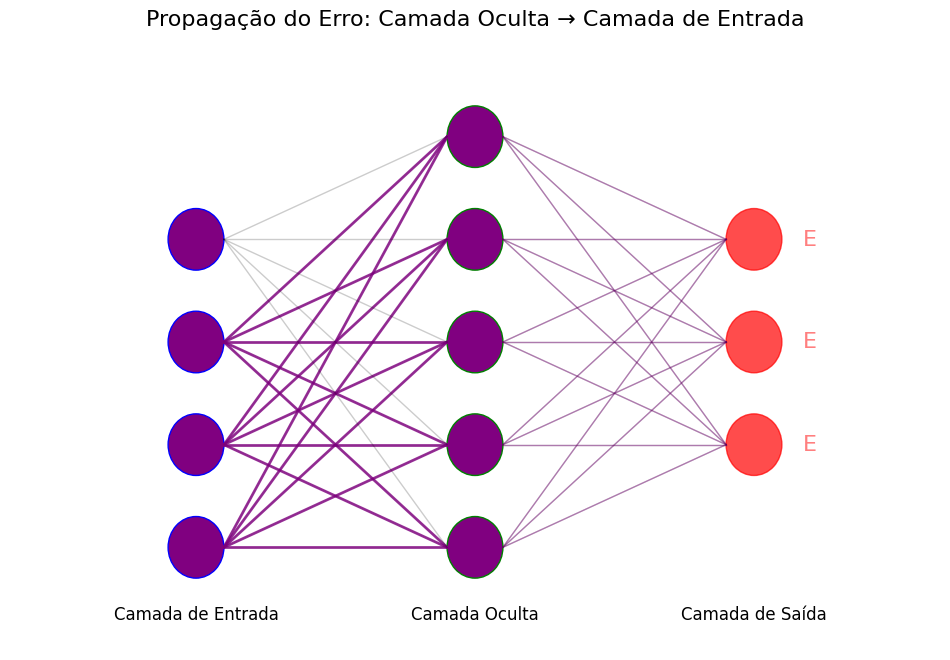

In [3]:
def create_backprop_visualization():
    """Cria uma visualização para o processo de backpropagation"""
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    
    # Posições dos neurônios
    input_pos = [(2, i) for i in range(1, 5)]
    hidden_pos = [(5, i) for i in range(1, 6)]
    output_pos = [(8, i) for i in range(2, 5)]
    
    # Desenhar neurônios
    input_neurons = [plt.Circle(pos, 0.3, fc='lightblue', ec='blue') for pos in input_pos]
    hidden_neurons = [plt.Circle(pos, 0.3, fc='lightgreen', ec='green') for pos in hidden_pos]
    output_neurons = [plt.Circle(pos, 0.3, fc='salmon', ec='red') for pos in output_pos]
    
    # Adicionar neurônios ao gráfico
    for neuron in input_neurons + hidden_neurons + output_neurons:
        ax.add_patch(neuron)
    
    # Adicionar texto para identificar as camadas
    ax.text(2, 0.3, 'Camada de Entrada', ha='center', fontsize=12)
    ax.text(5, 0.3, 'Camada Oculta', ha='center', fontsize=12)
    ax.text(8, 0.3, 'Camada de Saída', ha='center', fontsize=12)
    
    # Desenhar conexões entre neurônios
    connections_forward = []
    connections_backward = []
    
    # Conexões da camada de entrada para a camada oculta
    for i, pos_in in enumerate(input_pos):
        for j, pos_hid in enumerate(hidden_pos):
            line_forward, = ax.plot([pos_in[0]+0.3, pos_hid[0]-0.3], [pos_in[1], pos_hid[1]], 'k-', alpha=0.2, lw=1)
            line_backward, = ax.plot([pos_hid[0]-0.3, pos_in[0]+0.3], [pos_hid[1], pos_in[1]], 'k-', alpha=0, lw=1)
            connections_forward.append((line_forward, 'input-hidden', i, j))
            connections_backward.append((line_backward, 'hidden-input', j, i))
    
    # Conexões da camada oculta para a camada de saída
    for i, pos_hid in enumerate(hidden_pos):
        for j, pos_out in enumerate(output_pos):
            line_forward, = ax.plot([pos_hid[0]+0.3, pos_out[0]-0.3], [pos_hid[1], pos_out[1]], 'k-', alpha=0.2, lw=1)
            line_backward, = ax.plot([pos_out[0]-0.3, pos_hid[0]+0.3], [pos_out[1], pos_hid[1]], 'k-', alpha=0, lw=1)
            connections_forward.append((line_forward, 'hidden-output', i, j))
            connections_backward.append((line_backward, 'output-hidden', j, i))
    
    # Adicionar símbolos de erro na camada de saída
    error_symbols = []
    for i, pos in enumerate(output_pos):
        error = ax.text(pos[0] + 0.6, pos[1], "E", color='red', fontsize=16, ha='center', va='center', alpha=0)
        error_symbols.append(error)
    
    # Adicionar título
    title = ax.set_title('Fase de Backpropagation (Propagação Reversa)', fontsize=16)
    
    return fig, ax, connections_forward, connections_backward, input_neurons, hidden_neurons, output_neurons, error_symbols, title

# Criar a visualização inicial
fig, ax, connections_forward, connections_backward, input_neurons, hidden_neurons, output_neurons, error_symbols, title = create_backprop_visualization()

# Função para animar o processo de backpropagation
def animate_backpropagation(i):
    # Resetar cores e opacidade
    for neuron in input_neurons + hidden_neurons + output_neurons:
        neuron.set_alpha(0.7)
    
    for conn, _, _, _ in connections_forward:
        conn.set_alpha(0.2)
        conn.set_color('k')
        conn.set_linewidth(1)
    
    for conn, _, _, _ in connections_backward:
        conn.set_alpha(0)
    
    for error in error_symbols:
        error.set_alpha(0)
    
    # Fase 1: Mostrar o feedforward (resumido)
    if i < 10:
        title.set_text('Fase de Feedforward (Resumo)')
        progress = i / 9
        
        # Ativar neurônios de entrada
        for neuron in input_neurons:
            neuron.set_facecolor('blue')
            neuron.set_alpha(1.0)
        
        # Ativar conexões para camada oculta
        for conn, layer, _, _ in connections_forward:
            if layer == 'input-hidden':
                conn.set_alpha(0.8)
                conn.set_color('blue')
        
        # Ativar neurônios ocultos
        if i >= 3:
            for neuron in hidden_neurons:
                neuron.set_facecolor('green')
                neuron.set_alpha(1.0)
            
            # Ativar conexões para camada de saída
            for conn, layer, _, _ in connections_forward:
                if layer == 'hidden-output':
                    conn.set_alpha(0.8)
                    conn.set_color('green')
        
        # Ativar neurônios de saída
        if i >= 6:
            for neuron in output_neurons:
                neuron.set_facecolor('red')
                neuron.set_alpha(1.0)
    
    # Fase 2: Mostrar o cálculo do erro na camada de saída
    elif i < 20:
        title.set_text('Cálculo do Erro na Camada de Saída')
        progress = (i - 10) / 9
        
        # Manter neurônios ativos
        for neuron in input_neurons:
            neuron.set_facecolor('blue')
            neuron.set_alpha(0.7)
        for neuron in hidden_neurons:
            neuron.set_facecolor('green')
            neuron.set_alpha(0.7)
        for neuron in output_neurons:
            neuron.set_facecolor('red')
            neuron.set_alpha(1.0)
        
        # Mostrar símbolos de erro
        for j, error in enumerate(error_symbols):
            if j <= (i - 10) / 3:
                error.set_alpha(1.0)
    
    # Fase 3: Backpropagation da camada de saída para a camada oculta
    elif i < 35:
        title.set_text('Propagação do Erro: Camada de Saída → Camada Oculta')
        progress = (i - 20) / 14
        
        # Manter neurônios ativos
        for neuron in input_neurons:
            neuron.set_facecolor('blue')
            neuron.set_alpha(0.7)
        for neuron in hidden_neurons:
            neuron.set_facecolor('green')
            neuron.set_alpha(0.7)
        for neuron in output_neurons:
            neuron.set_facecolor('red')
            neuron.set_alpha(1.0)
        
        # Mostrar símbolos de erro
        for error in error_symbols:
            error.set_alpha(1.0)
        
        # Ativar conexões de backpropagation da camada de saída para a camada oculta
        for j, (conn, layer, src, dst) in enumerate(connections_backward):
            if layer == 'output-hidden' and j <= (i - 20):
                conn.set_alpha(0.8)
                conn.set_color('purple')
                conn.set_linewidth(2)
        
        # Destacar neurônios na camada oculta que recebem o erro
        if i >= 28:
            for j, neuron in enumerate(hidden_neurons):
                if j <= (i - 28):
                    neuron.set_facecolor('purple')
                    neuron.set_alpha(1.0)
    
    # Fase 4: Backpropagation da camada oculta para a camada de entrada
    else:
        title.set_text('Propagação do Erro: Camada Oculta → Camada de Entrada')
        progress = (i - 35) / 14
        
        # Manter neurônios ativos
        for neuron in input_neurons:
            neuron.set_facecolor('blue')
            neuron.set_alpha(0.7)
        for neuron in hidden_neurons:
            neuron.set_facecolor('purple')
            neuron.set_alpha(1.0)
        for neuron in output_neurons:
            neuron.set_facecolor('red')
            neuron.set_alpha(0.7)
        
        # Mostrar símbolos de erro (com menor destaque)
        for error in error_symbols:
            error.set_alpha(0.5)
        
        # Ativar conexões de backpropagation da camada oculta para a camada de entrada
        for j, (conn, layer, src, dst) in enumerate(connections_backward):
            if layer == 'output-hidden':
                conn.set_alpha(0.4)
                conn.set_color('purple')
                conn.set_linewidth(1)
            elif layer == 'hidden-input' and j <= (i - 35):
                conn.set_alpha(0.8)
                conn.set_color('purple')
                conn.set_linewidth(2)
        
        # Destacar neurônios na camada de entrada que recebem o erro
        if i >= 43:
            for j, neuron in enumerate(input_neurons):
                if j <= (i - 43):
                    neuron.set_facecolor('purple')
                    neuron.set_alpha(1.0)
    
    return input_neurons + hidden_neurons + output_neurons + [conn[0] for conn in connections_forward] + [conn[0] for conn in connections_backward] + error_symbols + [title]

# Criar a animação
ani = FuncAnimation(fig, animate_backpropagation, frames=50, interval=150, blit=True)

# Exibir a animação
HTML(ani.to_jshtml())

## Importância do Backpropagation

A fase de Backpropagation é crucial por várias razões:

1. **Atribuição de Responsabilidade**: Permite determinar quanto cada peso contribuiu para o erro total.
2. **Aprendizado Eficiente**: Fornece um método computacionalmente eficiente para calcular os gradientes necessários para a atualização dos pesos.
3. **Aprendizado em Camadas Profundas**: Possibilita o treinamento de redes neurais com múltiplas camadas ocultas.
4. **Base para Algoritmos Avançados**: Serve como fundamento para algoritmos de otimização mais sofisticados como Adam, RMSProp, etc.

No próximo notebook, exploraremos a última fase do algoritmo de Backpropagation: a Atualização dos Pesos.